# House Price Prediction with Stacked Regression

The goal of this notebook is to explore stacking as an extension of a regression problem.

### Kaggle Competition
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

### Data fields
<details>

<ul>
    <li>SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
    <li>MSSubClass: The building class</li>
    <li>MSZoning: The general zoning classification</li>
    <li>LotFrontage: Linear feet of street connected to property</li>
    <li>LotArea: Lot size in square feet</li>
    <li>Street: Type of road access</li>
    <li>Alley: Type of alley access</li>
    <li>LotShape: General shape of property</li>
    <li>LandContour: Flatness of the property</li>
    <li>Utilities: Type of utilities available</li>
    <li>LotConfig: Lot configuration</li>
    <li>LandSlope: Slope of property</li>
    <li>Neighborhood: Physical locations within Ames city limits</li>
    <li>Condition1: Proximity to main road or railroad</li>
    <li>Condition2: Proximity to main road or railroad (if a second is present)</li>
    <li>BldgType: Type of dwelling</li>
    <li>HouseStyle: Style of dwelling</li>
    <li>OverallQual: Overall material and finish quality</li>
    <li>OverallCond: Overall condition rating</li>
    <li>YearBuilt: Original construction date</li>
    <li>YearRemodAdd: Remodel date</li>
    <li>RoofStyle: Type of roof</li>
    <li>RoofMatl: Roof material</li>
    <li>Exterior1st: Exterior covering on house</li>
    <li>Exterior2nd: Exterior covering on house (if more than one material)</li>
    <li>MasVnrType: Masonry veneer type</li>
    <li>MasVnrArea: Masonry veneer area in square feet</li>
    <li>ExterQual: Exterior material quality</li>
    <li>ExterCond: Present condition of the material on the exterior</li>
    <li>Foundation: Type of foundation</li>
    <li>BsmtQual: Height of the basement</li>
    <li>BsmtCond: General condition of the basement</li>
    <li>BsmtExposure: Walkout or garden level basement walls</li>
    <li>BsmtFinType1: Quality of basement finished area</li>
    <li>BsmtFinSF1: Type 1 finished square feet</li>
    <li>BsmtFinType2: Quality of second finished area (if present)</li>
    <li>BsmtFinSF2: Type 2 finished square feet</li>
    <li>BsmtUnfSF: Unfinished square feet of basement area</li>
    <li>TotalBsmtSF: Total square feet of basement area</li>
    <li>Heating: Type of heating</li>
    <li>HeatingQC: Heating quality and condition</li>
    <li>CentralAir: Central air conditioning</li>
    <li>Electrical: Electrical system</li>
    <li>1stFlrSF: First Floor square feet</li>
    <li>2ndFlrSF: Second floor square feet</li>
    <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
    <li>GrLivArea: Above grade (ground) living area square feet</li>
    <li>BsmtFullBath: Basement full bathrooms</li>
    <li>BsmtHalfBath: Basement half bathrooms</li>
    <li>FullBath: Full bathrooms above grade</li>
    <li>HalfBath: Half baths above grade</li>
    <li>Bedroom: Number of bedrooms above basement level</li>
    <li>Kitchen: Number of kitchens</li>
    <li>KitchenQual: Kitchen quality</li>
    <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li>
    <li>Functional: Home functionality rating</li>
    <li>Fireplaces: Number of fireplaces</li>
    <li>FireplaceQu: Fireplace quality</li>
    <li>GarageType: Garage location</li>
    <li>GarageYrBlt: Year garage was built</li>
    <li>GarageFinish: Interior finish of the garage</li>
    <li>GarageCars: Size of garage in car capacity</li>
    <li>GarageArea: Size of garage in square feet</li>
    <li>GarageQual: Garage quality</li>
    <li>GarageCond: Garage condition</li>
    <li>PavedDrive: Paved driveway</li>
    <li>WoodDeckSF: Wood deck area in square feet</li>
    <li>OpenPorchSF: Open porch area in square feet</li>
    <li>EnclosedPorch: Enclosed porch area in square feet</li>
    <li>3SsnPorch: Three season porch area in square feet</li>
    <li>ScreenPorch: Screen porch area in square feet</li>
    <li>PoolArea: Pool area in square feet</li>
    <li>PoolQC: Pool quality</li>
    <li>Fence: Fence quality</li>
    <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
    <li>MiscVal: $Value of miscellaneous feature</li>
    <li>MoSold: Month Sold</li>
    <li>YrSold: Year Sold</li>
    <li>SaleType: Type of sale</li>
    <li>SaleCondition: Condition of sale</li>
</ul>

</details>

### Credits
This notebook cannot be completed with the helpful notes of the following works:
- [A study on Regression applied to the Ames dataset by Julien Cohen-Solal](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- [Regularized Linear Models by Alexandru Papiu](https://www.kaggle.com/apapiu/regularized-linear-models)
- [Comprehensive data exploration with Python by Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- [Stacked Regressions to predict House Prices by Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

In [178]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory


In [179]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
train_Id = train['Id']
test_ID = test['Id']

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# Data Processing
## Outliers
Generally, the price should increase with square footage. Using a scatterplot, we can see there are two outliers in the bottom right corner, where properties have a unusually high squre footage and a cheaper sale price. We will remove the outliers from the data.

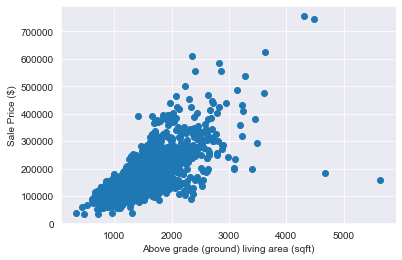

In [181]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.xlabel('Above grade (ground) living area (sqft)')
plt.ylabel('Sale Price ($)')
plt.show()

In [182]:
train.drop(train[(train['GrLivArea'] > 4000) 
           & (train['SalePrice'] < 300000)].index, 
           inplace= True)

## Target Variable to Normal Distribution

Linear models require normally distributed data. First, we found out the mean and variance using the norm.fit function. Then, we will plotted the frequency the Sale Prices using a distribution plot.

The training data is skewed to the left. This can be further visualized with a Q-Q plot (quantile-quantile) plot, which is a probability plot for compairing two probability distributions by plotting their quantiles.

To standardize the training data, or rescales it to have a mean of 0 and a standard deviation of 1, we will perform a logrithmic transformation.

In [183]:
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu: ', '%.2f' % mu,'sigma: ', '%.2f' % sigma)

mu:  180932.92 sigma:  79467.79


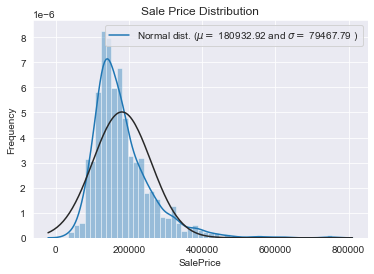

In [184]:
sns.distplot(train['SalePrice'], fit=norm)
plt.title('Sale Price Distribution')
plt.ylabel('Frequency')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

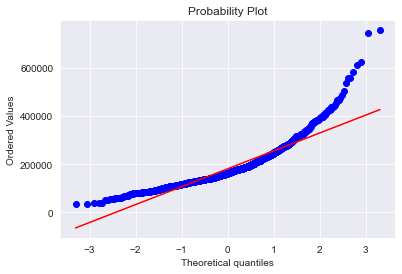

In [185]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [186]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [187]:
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu: ', '%.2f' % mu,'sigma: ', '%.2f' % sigma)

mu:  12.02 sigma:  0.40


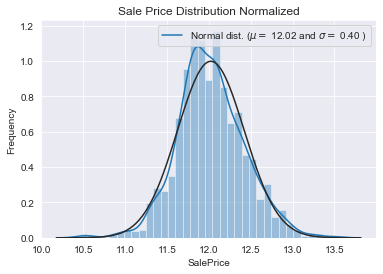

In [188]:
sns.distplot(train['SalePrice'], fit=norm)
plt.title('Sale Price Distribution Normalized')
plt.ylabel('Frequency')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

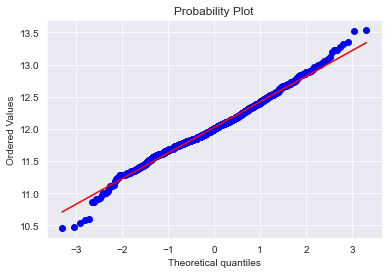

In [189]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Features Engineering
## Combine Train and Test Datasets

In [190]:
n_train = train.shape[0]
n_test = test.shape[0]
y_train = train.SalePrice.values
X_train_test = pd.concat((train, test)).reset_index(drop=True)
X_train_test.drop(['SalePrice'], axis=1, inplace=True)
X_train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.000,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Missing Data

In [191]:
missing_count = X_train_test.isnull().sum()[X_train_test.isnull().sum() != 0]

In [192]:
missing_data = pd.DataFrame({'Missing Count': missing_count,
                             'Missing Ratio': missing_count/len(X_train_test) *100})

In [193]:
missing_data = missing_data.sort_values(by=['Missing Count'], ascending=False)
missing_data

,Missing Count,Missing Ratio
PoolQC,2908,99.691
MiscFeature,2812,96.400
Alley,2719,93.212
Fence,2346,80.425
FireplaceQu,1420,48.680
LotFrontage,486,16.661
GarageFinish,159,5.451
GarageQual,159,5.451
GarageCond,159,5.451
GarageYrBlt,159,5.451


Text(0, 0.5, 'Missing Ratio')

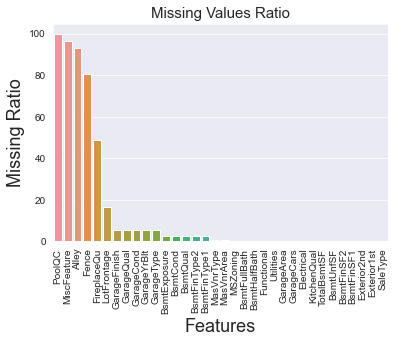

In [194]:
f, ax = plt.subplots()
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Missing Ratio'])
plt.title('Missing Values Ratio', fontsize=15)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Missing Ratio', fontsize=18)

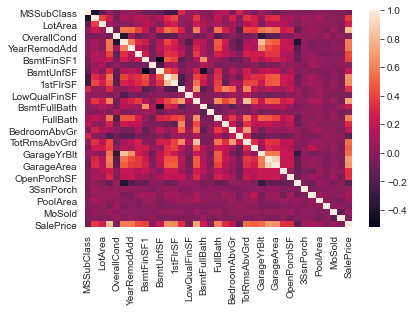

In [195]:
sns.heatmap(train.corr())

## Impute Missing Values

In [196]:
# for rare structures, missing values most likely correspond to nonexistent item

for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType','MSSubClass']:
    X_train_test[col] = X_train_test[col].fillna('None')



In [197]:
# No garage = no cars in such garage, same for basement properties

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'MasVnrArea']:
    X_train_test[col] = X_train_test[col].fillna(0)

In [198]:
# Group by neighborhood and fill in missing value by the median LotFrontage 

X_train_test['LotFrontage'] = X_train_test.groupby('Neighborhood')['LotFrontage']\
    .transform(lambda x: x.fillna(x.median()))

In [199]:
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

for col in ['MSZoning','Electrical', 'KitchenQual',
            'Exterior1st', 'Exterior2nd',
            'SaleType']:
    X_train_test[col] = X_train_test[col].fillna(X_train_test[col].mode()[0])


In [200]:
# drop features with little variation in value

X_train_test = X_train_test.drop(['Utilities'], axis=1)

In [201]:
# Functional : data description says NA means typical

X_train_test["Functional"] = X_train_test["Functional"].fillna("Typ")



In [202]:
X_train_test.isnull().sum().sum()

0

## Categorical Features

In [203]:
# building class, overall condition, year sold, month sold
for col in ['MSSubClass','OverallCond','YrSold','MoSold']:
    X_train_test[col] = X_train_test[col].apply(str)

## Label Encoding Categorical  Features with Ordering

In [204]:
from sklearn.preprocessing import LabelEncoder

In [205]:
for col in ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
            'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
            'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
            'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
            'YrSold', 'MoSold']:
    label = LabelEncoder() 
    label.fit(list(X_train_test[col].values)) 
    X_train_test[col] = label.transform(list(X_train_test[col].values))
    

## Create New Feature: Total Area

In [206]:
X_train_test['TotalArea'] = X_train_test['TotalBsmtSF'] + X_train_test['1stFlrSF'] + X_train_test['2ndFlrSF']


## Transform Skewed Features with Box Cox Transformation

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

The Box-Cox transformation of the variable x is also indexed by λ, and is defined as:

![box cox transformation](img/boxcox.png)

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

Notice with this definition of x prime lambda that x = 1 always maps to the point x prime lambda = 0 for all values of λ. 

![box cox transformation](img/boxcox2.png)

Examples of the Box-Cox transformation x prime lambda versus log(x) for −2 < λ < 3. The bottom curve corresponds to λ = −2 and the upper to λ = 3.

![box cox transformation](img/boxcox3.png)

scipy.special.boxcox1p(x, lmbda) Compute the Box-Cox transformation of 1 + x.

The Box-Cox transformation computed by boxcox1p is:
```
y = ((1+x)**lmbda - 1) / lmbda  if lmbda != 0
    log(1+x)                    if lmbda == 0
```
   
Returns nan if x < -1. Returns -inf if x == -1 and lmbda < 0.

In [207]:
# return the skew of each feature in a dataframe:
# find all the index of X_train_test features that are not object types, i.e. numerical types
# for each feature, drop NA values and determine the skew
# sort skewness of each feature in descending order

skew = pd.DataFrame({'Skew' : X_train_test[X_train_test.dtypes[X_train_test.dtypes != 'object'].index]\
                               .apply(lambda x: skew(x.dropna()))\
                               .sort_values(ascending=False)})
        


In [211]:
skew

,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [212]:
from scipy.special import boxcox1p

skew = skew[abs(skew) > 0.75]

lambda_param = 0.15
for f in skew.index:
    X_train_test[f] = boxcox1p(X_train_test[f], lambda_param) 

## Get Dummies for Categorical Features

In [213]:
X_train_test = pd.get_dummies(X_train_test)

## Split back to Train and Test Datasets

In [218]:
m = train.shape[0]
train = X_train_test[:m]
test = X_train_test[m:]

# Model

In [226]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# Cross Validation

We will shuffle the dataset prior to cross-validation since cross_val_score has no inherent shuffle attribute.

The evaluation metric is this regression problem we will be using is Root Mean Squared Log Error. 
```py
sklearn.metrics.mean_squared_log_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

<img src="img/rmsle.png" width="300">

It has several advantages over the traditional RMSE evaluation metric:
1. Robustness to the effect of the outliers
2. RMSLE metric only considers the relative error between and the Predicted and the actual value and the scale of the error is not significant. On the other hand, RMSE value Increases in magnitude if the scale of error increases.
3. RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation.  More penalty is incurred when the predicted Value is less than the Actual Value. This is especially useful for business cases where the underestimation of the target variable is not acceptable but overestimation can be tolerated.


Resource: 
- https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

In [230]:
n_folds = 5

def rmsle_cv(model): # Root Mean Squared Log Error.
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)


## Base Models

Sklearn's Robustscaler() method is used to make models less sensitive to outliers

In [243]:
# Lasso Regression
lasso = make_pipeline(RobustScaler(), 
                      Lasso(alpha =0.0005, 
                            random_state=1))

# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), 
                     ElasticNet(alpha=0.0005, 
                                l1_ratio=.9, 
                                random_state=3))

# Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, 
                  kernel='polynomial', 
                  degree=2, 
                  coef0=2.5)

# Gradient Boosting Regression (huber loss makes it robust to outliers)
GBoost = GradientBoostingRegressor(n_estimators=3000, 
                                   learning_rate=0.05,
                                   max_depth=4, 
                                   max_features='sqrt',
                                   min_samples_leaf=15, 
                                   min_samples_split=10, 
                                   loss='huber', 
                                   random_state =5)
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, 
                             gamma=0.0468, 
                             learning_rate=0.05, 
                             max_depth=3, 
                             min_child_weight=1.7817, 
                             n_estimators=2200,
                             reg_alpha=0.4640, 
                             reg_lambda=0.8571,
                             subsample=0.5213, 
                             verbosity=0,
                             random_state =7, 
                             nthread = -1)
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=5,
                              learning_rate=0.05, 
                              n_estimators=720,
                              max_bin = 55, 
                              bagging_fraction = 0.8,
                              bagging_freq = 5, 
                              feature_fraction = 0.2319,
                              feature_fraction_seed=9, 
                              bagging_seed=9,
                              min_data_in_leaf =6, 
                              min_sum_hessian_in_leaf = 11,
                              verbose_eval = -1)


## Base Models Scores

In [244]:
model = {
    'Lasso Regression': lasso, 
    'Elastic Net Regression': ENet, 
    'Kernel Ridge Regression': KRR, 
    'GBoost': GBoost, 
    'XGBoost': model_xgb, 
    'LightGBM': model_lgb
}
for k in model:
    score = rmsle_cv(model[k])
    print("{} score: {:.4f} ({:.4f})\n".format(k, score.mean(), score.std()))

Lasso Regression score: 0.1115 (0.0074)

Elastic Net Regression score: 0.1116 (0.0074)

Kernel Ridge Regression score: 0.1153 (0.0075)

GBoost score: 0.1167 (0.0083)

XGBoost score: 0.1158 (0.0064)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Curr

## Stacking Models - Averaging Method

Build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse, a key concept in inheritance.

We will define clones of the original models. We will use this clone to train and make predictions. The average of the predictions will be used.

The result shows that a simple stacking model using the averaging method beats any individual models alone.

In [245]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [246]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)

print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



## Stacking Models - Meta Model Method

With this approach we will add a meta-model on averaged base models. To train the meta-model, we will use the out-of-fold predictions of the base models.

An out-of-fold prediction is a prediction by the model during the k-fold cross-validation procedure. That is, out-of-fold predictions are those predictions made on the holdout datasets during the resampling procedure. If performed correctly, there will be one prediction for each example in the training dataset.

Training procedure:
1. Split the total training set into two disjoint sets (train and holdout)
2. Train several base models on the first part (train)
3. Test these base models on the second part (holdout)
4. Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

![out of fold](img/oof.jpg)

In [247]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [248]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0073)


# Esemble Model

In [250]:
# rmsle evaluation function

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## Previous Stacked Regressor

In [251]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

print(rmsle(y_train, stacked_train_pred))

0.07839506096665179


## XGBoost

In [252]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0786103062413744


## LightGBM

In [253]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.07169383068991829


## RMSE on the Entire Data

In [254]:
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

0.07543301958952575


## Ensemble Prediction

In [256]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

## Submission

In [257]:
submission = pd.DataFrame({'Id': test_ID, 'SalePrice': ensemble})
submission.to_csv('submission.csv', index=False)

In [258]:
submission

,Id,SalePrice
0,1461,120228.302
1,1462,159021.514
2,1463,185810.174
3,1464,195994.545
4,1465,191264.882
...,...,...
1454,2915,83788.842
1455,2916,82091.916
1456,2917,168796.852
1457,2918,116189.691
